In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./src/score_kakao.csv')
# df = pd.read_csv('./src/score_naver_0301.csv')
df

,날짜,댓글,BERT,LSTM
0,2022-05-30,주식 못하는 사람들 특징,0.553864,0.994536
1,2022-05-30,"정말, 알다가도 모르겠네.",0.078147,0.057030
2,2022-05-30,내일 86000원 넘어가겠네요.,0.127031,0.030609
3,2022-05-30,"성착취 수단 카카오, 카카오 섹스톡?",0.057843,0.999766
4,2022-05-30,오늘 몰빵했음,0.408828,0.462914
...,...,...,...,...
123495,2021-06-01,아놔...,0.589211,0.064660
123496,2021-06-01,@@앞으로 개인의 글은 제목에,0.390372,0.037853
123497,2021-06-01,카카오~~~~~~~~~~~,0.760452,0.082566
123498,2021-06-01,내일 12만원대 마지막 매수 기회주는날이...,0.496573,1.000000


<AxesSubplot:xlabel='날짜'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


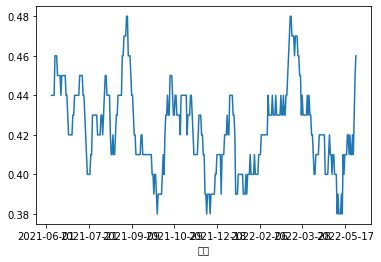

In [4]:
# BERT LSTM 평균
# ((df.groupby('날짜').mean()['BERT']+df.groupby('날짜').mean()['LSTM'])/2).rolling(10).mean().plot()
((df.groupby('날짜').mean()['BERT']+df.groupby('날짜').mean()['LSTM'])/2).rolling(7).mean().round(2).plot()

<AxesSubplot:xlabel='날짜'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


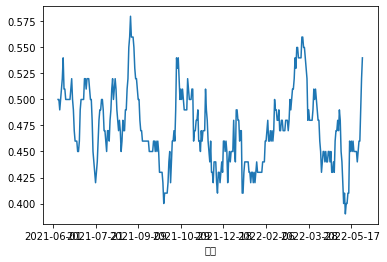

In [5]:
# LSTM중심 BERT가중치
# (0.5+(df.groupby('날짜').mean()['LSTM']-0.5)*(2+df.groupby('날짜').mean()['BERT'])).rolling(10).mean().plot()
(0.5+(df.groupby('날짜').mean()['LSTM']-0.5)*(1+df.groupby('날짜').mean()['BERT'])).rolling(7).mean().round(2).plot()

<AxesSubplot:xlabel='날짜'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


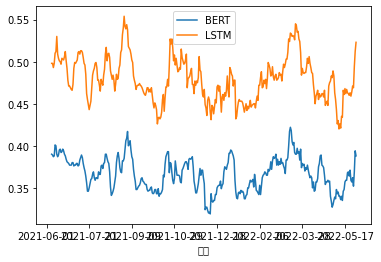

In [8]:
df.groupby('날짜').mean().rolling(7).mean().round(3).plot()

<AxesSubplot:xlabel='날짜'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


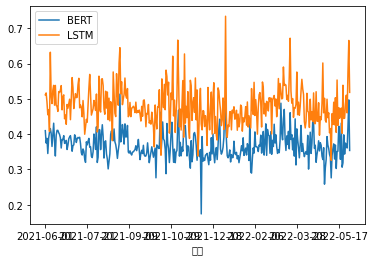

In [7]:
df.groupby('날짜').mean().plot()

In [41]:
import pandas as pd
import numpy as np
import re
import pickle
import requests
from bs4 import BeautifulSoup
from datetime import date
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

def konlpy_okt(df):
    okt = Okt()
    tag_list = ['Noun','Verb','Adjective','VerbPrefix'] 
    comment_list = df['댓글'].to_list()
    tokenized_data = []
    for i in range(len(comment_list)):
        tokenized_sentence = okt.pos(str(comment_list[i]), stem=True) 
        tag_checked_sentence = []
        for j in tokenized_sentence:
            x,y = j
            if y in tag_list:
                tag_checked_sentence.append(x)
        tokenized_data.append(tag_checked_sentence)   
        print(f'\r{i+1}개 형태소분리중',end='')
    for i in tokenized_data:
        for j in range(len(i)):
            i[j] = "'"+i[j]+"'"
    return tokenized_data
    
def tokenize(df):
    tokenized_data = konlpy_okt(df)
    test = tokenizer.texts_to_sequences(tokenized_data)
    test = pad_sequences(test, maxlen=15)
    return test

def feargreed_indexx(df): 
    test = tokenize(df)
    pred = model.predict(test)
    return pred

In [46]:
df['LSTM'] = feargreed_indexx(df)
df['LSTM'] = df['LSTM'].round(6)
df = df.reset_index(drop=True)
df

9433개 형태소분리중

,날짜,댓글,BERT,LSTM
0,2022-05-29,굿,0.943010,0.301843
1,2022-05-29,도대체왜 걸어다니면서 담배피는거냐?니들은...,0.055868,0.229988
2,2022-05-29,쇼핑업계 손절한 `빠른배송`…네이버는 어...,0.210454,0.000000
3,2022-05-29,낼 상한가...,0.227119,1.000000
4,2022-05-29,낼폭등,0.069681,1.000000
...,...,...,...,...
9428,2022-03-01,어르신들 .,0.404791,0.030063
9429,2022-03-01,차트는 좋네,0.153072,1.000000
9430,2022-03-01,[잘쳐먹고잘산다는미명하에 온갖곳에 악질이...,0.706786,1.000000
9431,2022-03-01,"●●●● 찢재명,,, 왈 ~~",0.845221,0.104308


In [42]:
# LSTM 토크나이저
with open('./src/lstm/goodtokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)  
# LSTM 모델
model = load_model('./src/lstm/goodmodel.h5')

In [43]:
df = pd.read_csv('./src/score_naver_0301.csv')
df

,날짜,댓글,BERT,LSTM
0,2022-05-29,굿,0.943010,0.002760
1,2022-05-29,도대체왜 걸어다니면서 담배피는거냐?니들은...,0.055868,0.003480
2,2022-05-29,쇼핑업계 손절한 `빠른배송`…네이버는 어...,0.210454,0.000000
3,2022-05-29,낼 상한가...,0.227119,0.999998
4,2022-05-29,낼폭등,0.069681,0.999996
...,...,...,...,...
9428,2022-03-01,어르신들 .,0.404791,0.002084
9429,2022-03-01,차트는 좋네,0.153072,0.999999
9430,2022-03-01,[잘쳐먹고잘산다는미명하에 온갖곳에 악질이...,0.706786,0.999999
9431,2022-03-01,"●●●● 찢재명,,, 왈 ~~",0.845221,0.013839


In [44]:
del df['LSTM']

In [51]:
df.to_csv('./src/score_naver_0301.csv',index=False)

In [2]:
import pandas as pd
x = pd.read_csv('./a.csv')
x

,날짜,제목,정보제공,링크,기사
0,2022-04-29,"""미래 푸드테크, 삼성·SK·네이버·카카오도 진출할 것""",머니투데이,https://finance.naver.com/item/news_read.naver...,\n\t\t\t [[2022 키플랫폼]이기원 서울대 푸드테크학과장]이기원 서울대학교...
1,2022-04-29,‘상생 행보’ 카카오…중기유통센터 손잡고 소상공인 지원,이코노미스트,https://finance.naver.com/item/news_read.naver...,\n소상공인 지원 프로그램 ‘톡스토어X판판대로 과정’ 오픈 톡스토어X판판대로...
2,2022-04-29,소상공인 파트너와 성장하는 ‘톡스토어’..카카오,파이낸셜뉴스,https://finance.naver.com/item/news_read.naver...,"\n카카오톡 쇼핑하기, 중소기업유통센터와 협업소상공인 판매자 위한 교육지원 프로그램..."
3,2022-04-28,"""카카오·네이버보다도 못하다고?""…삼성맨들 '부글부글'",한국경제,https://finance.naver.com/item/news_read.naver...,"\n삼성전자, 연봉인상률 9% 논의노사협의회, 임금 협상 진행 상황 공지카카오 15..."
4,2022-04-28,2040년까지 탄소 순 배출량 '0' 만든다…카카오 '넷 제로' 원칙 ...,이코노미스트,https://finance.naver.com/item/news_read.naver...,\n환경 문제 해결하기 위한 '액티브 그린 이니셔티브' 공개카카오 탄소 지수로 이행...
...,...,...,...,...,...
5571,2021-05-03,"카카오-카카오커머스, ‘톡스토어 판매자’ 키운다",파이낸셜뉴스,https://finance.naver.com/item/news_read.naver...,\n‘톡스토어 판매자 양성과정’ 참가자 1200명제주도 등 전국 6개 창조경제혁신센...
5572,2021-05-03,"카카오·카카오커머스, '톡스토어' 판매자 양성 과정 진행",서울경제,https://finance.naver.com/item/news_read.naver...,\n\t\t\t [서울경제] 카카오와 카카오커머스는 전국 6개 창조경제혁신센터와 손...
5573,2021-05-01,KT와 카카오의 공유자전거 힘겨루기…T바이크에 타조 맞불,매일경제,https://finance.naver.com/item/news_read.naver...,\n카카오모빌리티에서 운영하는 카카오T바이크 [매경DB] 바야흐로 공유자전거 전성시...
5574,2021-04-30,"네이버 오른다는데…공매도 타깃된 카카오 ""나 떨고있니?""",머니투데이,https://finance.naver.com/item/news_read.naver...,\n\t\t\t [머니투데이 구단비 기자] [[오늘의 포인트]]/사진제공=네이버오는...
